-------------------------

 ## SER 347 - ST METRICS

--------------------------




Ouvintes: José Guilherme Fronza e Michel Eustáquio Dantas Chaves 

Data: 08/06/2020

## Sobre o ST METRICS

##### The stmetrics, is a python package that provides the extraction of state-of-the-art time-series features. These features can be used for remote sensing time-series image classification and analysis.

## Instalação

01: Instalação do pacote [stmetrics](https://stmetrics.readthedocs.io/en/latest/index.html) (Soares et al., 2020). Este pacote permite a extração de métricas fenológicas de classes de uso e cobertura da terra avaliadas no espaço e no tempo.

In [ ]:
#!pip install git+https://github.com/andersonreisoares/stmetrics@spatial --upgrade

## Importação de Libs


02: Importação de bibliotecas utilizando comandos 'import' do ambiente Jupyter correspondente ao ambiente criado, considerando o Kernel específico para este ambiente.

In [18]:
###Importing libs that we'll use to run your code
# Python Native
import os
import multiprocessing as mp
# 3rd party
import gdal
import rasterio
import stmetrics
import numpy
import pandas
import matplotlib.pyplot as plt
import shapely
from shapely.geometry import shape
import fiona
from rasterio.mask import mask
from rasterio.windows import Window
import warnings
warnings.filterwarnings('ignore')

#how to get help in stmetrics
#help(stmetrics.basics.amplitude)


## Dados utilizados 


Brazil Data Cube - [Portal](http://brazildatacube.dpi.inpe.br/portal/explore)

Cubo Landsat Stack Mensal - 2017 - 2019 - NDVI

Task do projeto - inspeção de alvos pseudo-invariantes e espectralmente "estáveis" 

In [1]:
import stac

In [2]:
stac.__version__

'0.8.1-1'

In [3]:
stac = stac.STAC('http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.1/')

In [4]:
stac.catalog

['C4_64',
 'C4_64_16D_MED',
 'C4_64_16D_STK',
 'C4_64_1M_MED',
 'C4_64_1M_STK',
 'HLS.L30',
 'HLS.S30',
 'LC8_30',
 'LC8_30_1M_MED',
 'LC8_30_1M_STK',
 'LC8DN',
 'LC8SR',
 'MOD13Q1',
 'MYD13Q1',
 'S2_10',
 'S2_10_16D_MED',
 'S2_10_16D_STK',
 'S2_10_1M_MED',
 'S2_10_1M_STK',
 'S2_MSI_L2_SR_LASRC',
 'S2SR_SEN28',
 'S2TOA']

In [5]:
collection = stac.collection('LC8_30_1M_STK')
collection

{'description': 'Landsat8 Cubes 30m - Monthly',
 'extent': {'spatial': {'bbox': [[-56.3667152139104,
     -19.988164021975,
     -43.3594820794987,
     -9.3595005044585]]},
  'temporal': {'interval': [['2017-01-01', '2019-12-31']]}},
 'id': 'LC8_30_1M_STK',
 'license': '',
 'links': [{'href': 'http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.1/collections/LC8_30_1M_STK',
   'rel': 'self'},
  {'href': 'http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.1/collections/LC8_30_1M_STK/items',
   'rel': 'items'},
  {'href': 'http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.1/collections',
   'rel': 'parent'},
  {'href': 'http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.1/collections',
   'rel': 'root'},
  {'href': 'http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.1/stac',
   'rel': 'root'}],
 'properties': {'bdc:bands': {'blue': {'data_type': 'int16',
    'description': '',
    'fill': -9999,
    'max': 10000.0,
    'mime_type': 'image/tiff',
    'min': 0.0,
    'name': 'blue',
    'resolution_unit': 'm

In [10]:
items = collection.get_items(filter={'bbox':'-46.64246,-11.34137,-45.14282,-12.19776',
                                     'time':'2016-09-13/2019-12-31', 'limit':1000})

In [11]:
#create empty list 
lst = []

#get ndvi links to images in Brazil Data Cube
for item in range(0, len(items.features)):
    #print(item)
    #print(items.features)
    lst.append(items.features[item].assets['ndvi']['href'])

In [13]:
len(lst)

36

In [14]:
lst

['http://brazildatacube.dpi.inpe.br/Repository/Mosaic/LC8_30_1M_STK/089097/2019-12-01_2019-12-31/LC8_30_1M_STK_089097_2019-12-01_2019-12-31_ndvi.tif',
 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/LC8_30_1M_STK/089097/2019-11-01_2019-11-30/LC8_30_1M_STK_089097_2019-11-01_2019-11-30_ndvi.tif',
 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/LC8_30_1M_STK/089097/2019-10-01_2019-10-31/LC8_30_1M_STK_089097_2019-10-01_2019-10-31_ndvi.tif',
 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/LC8_30_1M_STK/089097/2019-09-01_2019-09-30/LC8_30_1M_STK_089097_2019-09-01_2019-09-30_ndvi.tif',
 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/LC8_30_1M_STK/089097/2019-08-01_2019-08-31/LC8_30_1M_STK_089097_2019-08-01_2019-08-31_ndvi.tif',
 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/LC8_30_1M_STK/089097/2019-07-01_2019-07-31/LC8_30_1M_STK_089097_2019-07-01_2019-07-31_ndvi.tif',
 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/LC8_30_1M_STK/089097/2019-06-01_2019-06-

## Teste abrir uma imagem do Brazil Data Cube STAC

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9999.0, 'width': 5246, 'height': 3908, 'count': 1, 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",-50],PARAMETER["standard_parallel_1",10],PARAMETER["standard_parallel_2",-40],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(30.0, 0.0, 332692.0,
       0.0, -30.0, -1356630.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


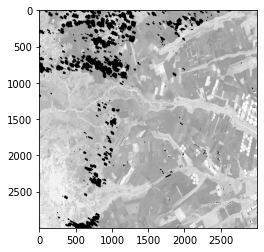

In [19]:
lst1 = lst[0]
with rasterio.open(lst1) as dataset:
    print(dataset.profile)
    #img = dataset.read(1) ### open entire scene is heavy
    
    img = dataset.read(1, window=Window(0, 0, 3000, 3000)) ### Window(col_off, row_off, width, height)
    
    plt.imshow(img, cmap='gray')
    plt.show()

## Função Listar

03: Definição de uma função para listar todas as imagens contidas na pasta padrão dos dados de entrada. Ao todo, foram consideradas 36 imagens entre os anos de 2017 e 2019.

In [ ]:
# Function to list all images from input path - LOCAL files
#If you use BDC STAC, don't run this step
def list_all_images(image_path):
    # Creates an empty list
    li_bands = []
    for name in os.listdir(image_path):
            li_bands.append(os.path.join(image_path,name))
    li_bands.sort()
    return li_bands

## Listar imagens

04: Obtenção da leitura e listagem das imagens contidas na pasta padrão dos dados de entrada. Output: leitura e listagem dentro do ambiente Jupyter.


In [ ]:
# List input images in folder to stack over time 2017~2019 - 36 images - LOCAL files. 
#If you use BDC STAC, don't run this step

#input path folder 
path = 'path'

#run function created above to list input path folder
listimg = list_all_images(path)

#print total image in list to check
print(len(listimg))

#print images names - list elements - to check

print(listimg)

## Construir stack de 36 datas NDVI dentro da lista

05: Definição de pasta padrão para o armazenamento do arquivo stack gerado a partir de toda a série de imagens contidas na pasta padrão dos dados de entrada. Output: leitura das 36 imagens e mosaico de todas elas.


In [ ]:
# Input output path to image data stack
path_out = 'path'

#set working output dir
os.chdir(path_out)

# Read metadata of first file.
#Change listimg[0] to BDC list if you use BDC STAC
with rasterio.open(listimg[0]) as src0:
    #read metadata of first file in the list and put into "meta"
    meta = src0.meta
    
# Update "meta" to get total list items. 
#Change listimg to BDC list if you use BDC STAC
meta.update(count = len(listimg))

# Read each layer and write it to stack
with rasterio.open('stack.tif', 'w', **meta) as dst:
    #loop to list images in listimg. 
    #Change listimg[0] to BDC list if you use BDC STAC
    for id, layer in enumerate(listimg, start=1):
        print(id, layer)
        #open the "layer" as src1
        with rasterio.open(layer) as src1:
            #write it in dst temp file
            dst.write_band(id, src1.read(1))

## Reprojeta stack para mesma projeção do shapefile de amostras

06: Determinação de comando utilizando a biblioteca gdal para condicionar a projeção da imagem stack para a mesma projeção dos dados amostrais, EPSG:32723. Ainda nesta etapa, foi definida a pasta padrão para alocar o arquivo com nova projeção.

In [ ]:
### Using gdal warp to reproject stack tif

# Set input file name to warp
filename = r"/image.tif"

# Open the input file with gdal.Open
input_raster = gdal.Open(filename)

# Set output file name
output_raster = r"/imageR.tif"

# Warp the input tif to selected EPSG in dstSRS
gdal.Warp(output_raster,input_raster,dstSRS='EPSG:32723')

# Clean memory
del input_raster
del output_raster

## Leitura do shapefile e extração das amostras selecionadas por 'Id'

07: Leitura dos arquivos de amostras, em formato shapefile (.shp), e seleção de talhões específicos para análise no stmetrics.

In [ ]:
## Open shapefile geometry to select id from list
shapefile_path = 'path/amostras.shp'

#select list shapefile ID to crop and input in STMETRICS
list_ids = [1, 2, 3, 4, 5, 6]

#output path to selected id shapefile
path_out = 'path'

#set working output dir
os.chdir(path_out)        

#fiona to open shapefile, write meta variable
with fiona.open(shapefile_path, "r") as entrada:
    #get metadata 
    meta = entrada.meta
    #write shapefile output 
    with fiona.open('shp_selected_ids.shp', 'w',**meta) as output:
        for feature in entrada:
            #loop to list ids from list_ids variable
            for i in list_ids:
                #if to check selected id and write in output
                if feature['properties']['Id'] == i:
                    output.write(feature)

## Construir crops da imagem nas áreas da amostra*
*Esta estratégia foi necessária para conseguirmos rodar o stmetrics eficientemente




08: Definição e leitura de extensão geométrica para cada amostra (talhão) escolhida para avaliação.


09: Definição de comando para a sobreposição entre o arquivo stack de imagens ao longo do tempo e o arquivo shapefile de amostras.

10: Definição de pasta padrão para alocação dos produtos gerados a partir da etapa anterior. Ainda nesta etapa, abertura do arquivo .tif e recorte com base nos limites geográficos de cada talhão analisado.



In [ ]:
#input path to write crops (raster subset by shapefile id),
#this is considered by the processing time of stmetrics
path_out = 'path_out_crops'

#set working output dir
os.chdir(path_out)

#open shapefile 
with fiona.open('path/shp_selected_ids.shp', "r") as shapefile:
    for feature in shapefile:
        # obtendo a geometria associada a feição
        geom = shape(feature["geometry"])
        #print(feature)
        #open tif to crop by selected ids
        with rasterio.open('/path/imageR.tif', "r") as src:
            out_image, out_transform = rasterio.mask.mask(src, [geom], crop=True)
            out_meta = src.meta
        #print(str(feature['properties']['Id']))
        #output file name 
        out_file = str(feature['properties']['Id']) + 'masked.tif'
        #metadata write
        out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
        #write output in crop tif 
        with rasterio.open(out_file, "w", **out_meta) as dest:
            dest.write(out_image)

## Lista a pasta de crops para rodar no stmetrics

11: Listagem dos talhões escolhidos para análise dentro do conjunto de amostras disponível e recorte da série temporal de cada talhão de acordo com a extensão dos limites geográficos de cada um.

In [ ]:
#input path to cropped tifs
path = 'path_crops'

#list cropped images
listcrop = list_all_images(path)

#print list crop
print(listcrop)

## Loop do stmetrics na lista de raster cropados (amostras)

12: Comando para a extração de métricas a partir dos recortes gerados.

In [ ]:
#initialize empty list variable
im_crop = []

#loop to run sits2metrics for cropped images
for crop in listcrop: 
    dataset = rasterio.open(crop)
    #metricas = numpy.vstack(lista)
    im_crop.append(stmetrics.metrics.sits2metrics(dataset))

## Verificação básica das saídas do stmetrics

13: Listagem das dimensões de análise e determinação da geração de figuras de cada talhão analisado em cada métrica a ser considerada.


In [ ]:
###tests to check the list of numpy arrays, stmetrics output

#check crop dimensions
#im_crop[3].ndim

#check total crop 
print(len(im_crop))

#check data type to use
print(type(im_crop))

#plot a crop to test plt.imshow
plt.imshow(im_crop[2][1,:,:])

## Construção do plot gráfico com os crops e as 19 métricas

14: Determinação das métricas consideradas, acesso à lista de imagens, ao arquivo .shp contendo as dimensões espaciais de cada talhão em linhas e colunas. Ainda nesta etapa, determinação das configurações dos arquivos de saída, inclusive das figuras geradas para cada talhão.

In [ ]:
#create header to metrics in stmetrics lib
header=["Mean", "Max", "Min", "Std", "Sum","Amplitude","First_slope","Area","Area_s1","Area_s2","Area_s3","Area_s4","Circle","Gyration","Polar_balance","Angle", "DFA","Hurst","Katz"]

#initialize figure (all) and ax with 19 rows and each crop in new column
fig, ax  = plt.subplots(19, len(im_crop) , figsize=(10,30))

#loop to create columns on lenght of cropped tifs
for column in range(1,len(im_crop)+1):
    #print(column)
    for b, n in zip(range(1, im_crop[0].shape[0]+1),header):
        #b is the metrics index - over 19 metrics
        #n is the header index  - over 19 metrics names
        #column to control the column ax -column index
        #print(column, b, n)
        # here we walk through ax row and column to plot with imshow
        ax[b-1, column-1].imshow(im_crop[column-1][b-1,:,:])
        plt.tight_layout()
        #set header title to ax
        ax[b-1, column-1].set_title(n)
#show figure
plt.show()       

#extras - to save figure
#fig.savefig('out_crop' +'.png', dpi=300, bbox_inches='tight')
#plt.close(fig=None)

In [ ]:
## Salvar figura

fig.savefig('out_crop' +'.png', dpi=500, bbox_inches='tight')

## Extração da média para a amostra para cada data e armazenamento do dado

15: Construção de listas de valores da média dos talhões para inserir em gráficos de série temporal, objetivando observar o comportamento temporal do NDVI ao longo do período selecionado.

In [ ]:
# initialize empty list variable
l = []

#for to get mean value to crop in 36 time points
for crop in listcrop:
    #initialize and clear totalcrop for an 36 time poins stack
    totalcrop = []
    #append totalcrop in a list of lists called l
    l.append(totalcrop)
    #open crop
    with rasterio.open(crop) as cropimg:
        #iterate over bands
        for b in range(1, cropimg.count+1):
            #read band
            data = cropimg.read(b)
            #calculate mean not considering no data -9999 values
            average = data[data!=-9999].mean()
            #print(b, average)
            #append the mean in totalcrop list
            totalcrop.append(average) 
            #print(b, mean)
            #create a variable num_time
            num_time = cropimg.count

## Construção da série temporal das amostras

16: Construção dos gráficos para os talhões ao longo do período analisado.


In [ ]:
#create a time range to use in plot
time = range(1, num_time+1)

#print(time)

#valores_cro1 = l[0]
lencrop = (len(l))


#initialize figure with crop lenght in rows
fig, ax  = plt.subplots(nrows=lencrop,ncols=1, figsize=(20,20))

#loop to create rows in lenght of cropped tifs
for b in range(0, len(l)):
    #save crop in valores crop to use in plot
    valores_crop = l[b]
    #ax plot the time and valores_crop
    ax[b].plot(time,valores_crop)
    #plt.tight_layout()
    #set header title to ax
    n = os.path.basename(listcrop[b])[0:-4]
    ax[b].set_title(n)
#show figure
plt.show()
#fig.savefig('out_series' +'.png', dpi=500, bbox_inches='tight')